In [ ]:
from google.colab import drive
drive.mount("content/",  force_remount=True)

Mounted at content/


In [ ]:
# !ls content/MyDrive/Colab_Notebooks/image_dataset/oxford-iiit-pet/
# Directory of oxford-iiit-pet
dir = "content/MyDrive/Colab_Notebooks/image_dataset/oxford-iiit-pet/"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
import os
from skimage import io, color, feature, exposure
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
from skimage.transform import resize
import joblib
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import seaborn as sns

In [ ]:
# Function to extract HOG features from an image and visualize it
# def extract_hog_features(image):

#     # Check if the image has an alpha channel (fourth channel)
#     if image.shape[-1] == 4:
#         # Convert RGBA to RGB by discarding the alpha channel
#         image = image[:, :, :3]

#     gray_image = color.rgb2gray(image)


#     hog_features, hog_img = feature.hog(
#             gray_image, pixels_per_cell=(14,14),
#             cells_per_block=(2, 2),
#             orientations=9,
#             visualize=True,
#             block_norm='L2-Hys')  # Specify block_norm

#     hog_img = exposure.rescale_intensity(hog_img, in_range=(0, 10))

#     return hog_features, hog_img

# Function to extract HOG features from an image and visualize it
def extract_hog_features(image):

    # Check if the image has an alpha channel (fourth channel)
    if image.shape[-1] == 4:
        # Convert RGBA to RGB by discarding the alpha channel
        image = image[:, :, :3]

    gray_image = color.rgb2gray(image)


    hog_features = feature.hog(
            gray_image, pixels_per_cell=(14,14),
            cells_per_block=(2, 2),
            orientations=9,
            block_norm='L2-Hys')  # Specify block_norm


    return hog_features

In [94]:
# Feature Extraction [(2 Dogs, 3 Cats)][400, 600]

# Dog - Cat
# List image folder and get annotation
images_folder =  f"{dir}images/images/"
file_labels = open(f"{dir}annotations/list.txt", 'r')
cat_folder = images_folder + "cats/"
dog_folder = images_folder + "dogs/"

# File Reading
data = file_labels.readline()

# Splitting Images into 2 Folders
# while data:
#   line = data.split(" ")
#   img_name = f"{line[0]}.jpg"
#   img_path = f"{images_folder}{img_name}"

#   try :
#     line[2] = int(line[2])
#     if line[2] == 1:
#       destination = cat_folder

#     elif line[2] == 2 :
#       destination = dog_folder

#     try:
#       shutil.move(img_path, destination)
#     except :
#       print(f"Cannot move {img_path}")

#   except :
#     pass

#   data = file_labels.readline()

# print("Finish Copying")


species = {
      0 : {},
      1 : {}

}




while data:
  line = data.split(" ")
  img_name = "_".join(line[0].split("_")[:-1])
  try :
    line[2] = int(line[2])
    species[line[2]-1][img_name] = species[line[2]-1].get(img_name, 0) + 1
  except :
    pass

  data = file_labels.readline()

print("Finish Extracting Labels")

# print(species)
# dog_list & cat_list
dog_list = []
cat_list = []

# labelsss = "Labels : "
# for key in species :
#   for name in species[key] :
#     print(name)
#     labelsss +=  f"{str(name)}, "

# print (labelsss)

for kind, count in species[0].items():
    if len(cat_list) == 3 :
      break

    if count == 200 :
      cat_list.append(kind)

for kind, count in species[1].items():
    if len(dog_list) == 2 :
      break

    if count == 200 :
      dog_list.append(kind)


species[0] = cat_list
species[1] = dog_list

# print(species)
# Images List
image_list = []

# Feature Extraction
features_list = []
labels_list = []
binary_labels_list = []
label_species = 1

# print(os.scandir(images_folder))
# Looping over Folders
for folder in os.scandir(images_folder):
    # print(folder.name)

    if folder.is_dir():
      if folder.name == 'cats':
        label = 0
      else :
        label = 1

      for name in species[label]:
        # Looping over Images
        for number in range(1, 250):
          # Improvement => make equally species images [Get equal numbers of each Breed so, it is not baised!]
          img_path = f"{folder.path}/{name}_{number}.jpg"
          print(f"Image : {img_path} is under pre-processing!")

          try :
            # Read Image
            image = io.imread(img_path)

            # Image resizing
            image = resize(image, (600,300))


            # Extract Features
            # feature_list, img = extract_hog_features(image)
            feature_list = extract_hog_features(image)

            # Display the original image and the HOG features
            # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)


            # ax1.axis('off')
            # ax1.imshow(image, cmap=plt.cm.gray)

            # ax2.axis('off')
            # ax2.imshow(img, cmap=plt.cm.gray)

            # plt.show()

            # Append the label to the labels list
            features_list.append(feature_list)
            labels_list.append(label_species)
            binary_labels_list.append(label)
          except Exception as e :
            print(f"{str(e)} Error : {img_path}")

        label_species += 1


print("Finish Load")

Finish Extracting Labels
Image : content/MyDrive/Colab_Notebooks/image_dataset/oxford-iiit-pet/images/images/cats/Bengal_1.jpg is under pre-processing!
Image : content/MyDrive/Colab_Notebooks/image_dataset/oxford-iiit-pet/images/images/cats/Bengal_2.jpg is under pre-processing!
Image : content/MyDrive/Colab_Notebooks/image_dataset/oxford-iiit-pet/images/images/cats/Bengal_3.jpg is under pre-processing!
Image : content/MyDrive/Colab_Notebooks/image_dataset/oxford-iiit-pet/images/images/cats/Bengal_4.jpg is under pre-processing!
Image : content/MyDrive/Colab_Notebooks/image_dataset/oxford-iiit-pet/images/images/cats/Bengal_5.jpg is under pre-processing!
Image : content/MyDrive/Colab_Notebooks/image_dataset/oxford-iiit-pet/images/images/cats/Bengal_6.jpg is under pre-processing!
Image : content/MyDrive/Colab_Notebooks/image_dataset/oxford-iiit-pet/images/images/cats/Bengal_7.jpg is under pre-processing!
Image : content/MyDrive/Colab_Notebooks/image_dataset/oxford-iiit-pet/images/images/ca

In [95]:
# Convert lists to NumPy arrays
features_array = np.array(features_list)
labels_array = np.array(labels_list)
binary_labels_array = np.array(binary_labels_list)


print(features_array)
print(labels_array)

[[0.2154987  0.14039081 0.15123429 ... 0.21621496 0.2571532  0.13358338]
 [0.02019346 0.04039182 0.02190496 ... 0.05417006 0.13913538 0.19306663]
 [0.14049355 0.19571326 0.04703247 ... 0.01730118 0.04609517 0.10060392]
 ...
 [0.3191164  0.04827603 0.02326313 ... 0.05616948 0.09562944 0.27668561]
 [0.11932652 0.07191888 0.09668749 ... 0.0781744  0.10543532 0.10495157]
 [0.3094895  0.12653894 0.03318428 ... 0.11372894 0.24982091 0.26087529]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [96]:
# Reshaping Features!
features_np = features_array.reshape(len(features_array), -1)
print(features_np.shape)


(984, 29520)


In [97]:
# Save multiple arrays to a file
np.savez(f'{dir}image_model.npz', features_np=features_np, labels_array=labels_array, binary_labels_array=binary_labels_array)



In [98]:
# Load multiple arrays from the saved file
loaded_data = np.load(f'{dir}image_model.npz')
features_np = loaded_data['features_np']
labels_array = loaded_data['labels_array']
binary_labels_array = loaded_data['binary_labels_array']

Exception ignored in: <function NpzFile.__del__ at 0x7855a4166b90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py", line 223, in __del__
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py", line 218, in close
OSError: [Errno 107] Transport endpoint is not connected


In [99]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_np, labels_array, test_size=0.3,
                                                    stratify = labels_array,
                                                    random_state=42)

X_train, X_test, y_binary_train, y_binary_test = train_test_split(features_np, binary_labels_array, test_size=0.3,
                                                    stratify = binary_labels_array,
                                                    random_state=42)

In [100]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000) # solver='lbfgs'
model_liblinear = LogisticRegression(solver='liblinear', max_iter=1000)

# Train 5 classes using 2 models
model_liblinear.fit(X_train, y_train)
model.fit(X_train, y_train)


model_binary = LogisticRegression(max_iter=1000)
model_binary_liblinear = LogisticRegression(solver='liblinear', max_iter=1000)

# Train 2 classes using 2 models
model_binary.fit(X_train, y_binary_train)
model_binary_liblinear.fit(X_train, y_binary_train)

# Predict on 5 classes
y_pred = model.predict(X_test)
y_pred_liblinear = model_liblinear.predict(X_test)

# Predict on 2 Classes
y_binary_pred = model_binary.predict(X_test)
y_binary_pred_liblinear = model_binary_liblinear.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           1       0.20      0.22      0.21        60
           2       0.20      0.23      0.22        60
           3       0.23      0.21      0.22        56
           4       0.13      0.12      0.12        60
           5       0.23      0.22      0.22        60

    accuracy                           0.20       296
   macro avg       0.20      0.20      0.20       296
weighted avg       0.20      0.20      0.20       296

Confusion Matrix Before Feature Scaling : 
[[13 14  9  8 16]
 [12 14 13 15  6]
 [11 10 12 15  8]
 [15 17  8  7 13]
 [13 14 10 10 13]]


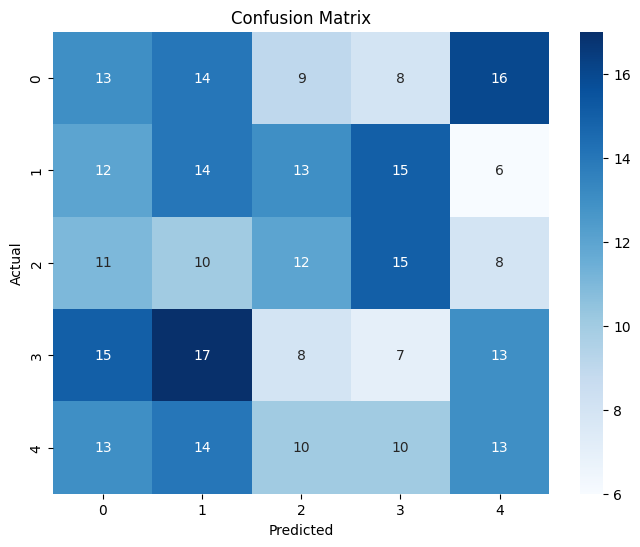

 
Classification Report:
               precision    recall  f1-score   support

           1       0.20      0.20      0.20        60
           2       0.18      0.20      0.19        60
           3       0.21      0.20      0.20        56
           4       0.13      0.12      0.12        60
           5       0.22      0.22      0.22        60

    accuracy                           0.19       296
   macro avg       0.19      0.19      0.19       296
weighted avg       0.19      0.19      0.19       296

Confusion Matrix liblinear Before Feature Scaling : 
[[12 14 10  8 16]
 [12 12 13 15  8]
 [11 12 11 14  8]
 [14 15  9  7 15]
 [12 15 10 10 13]]


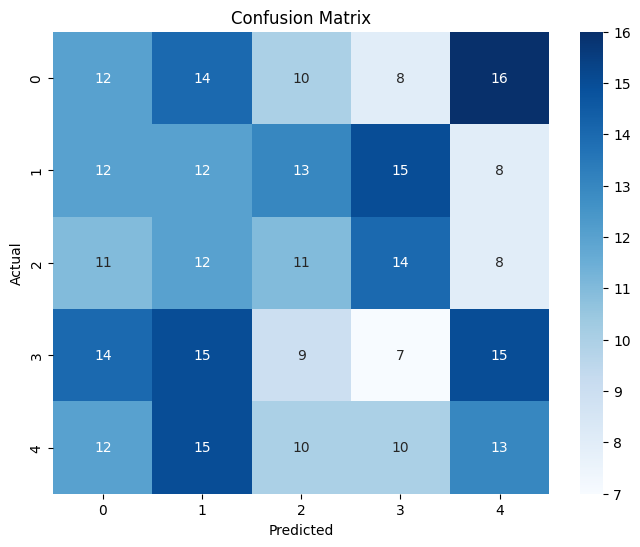

Accuracy Before Feature Scaling :  0.19932432432432431
Accuracy liblinear Before Feature Scaling : 0.1858108108108108


In [101]:
# Analysis on 5 classes prediction
cm = confusion_matrix(y_test, y_pred)
cm_liblinear = confusion_matrix(y_test, y_pred_liblinear)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print(f"Confusion Matrix Before Feature Scaling : \n{cm}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(" ")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_liblinear))

# Confusion Matrix
print(f"Confusion Matrix liblinear Before Feature Scaling : \n{cm_liblinear}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_liblinear, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print(f"Accuracy Before Feature Scaling :  {accuracy_score(y_test, y_pred)}")
print(f"Accuracy liblinear Before Feature Scaling : {accuracy_score(y_test, y_pred_liblinear)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.19      0.33      0.24        60
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        56
           4       0.00      0.00      0.00        60
           5       0.00      0.00      0.00        60

    accuracy                           0.07       296
   macro avg       0.03      0.06      0.04       296
weighted avg       0.04      0.07      0.05       296

Confusion Matrix Binary Classes Before Feature Scaling : 
[[135  41]
 [ 55  65]]
 
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.19      0.32      0.23        60
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        56
           4       0.00      0.00      0.00        60
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

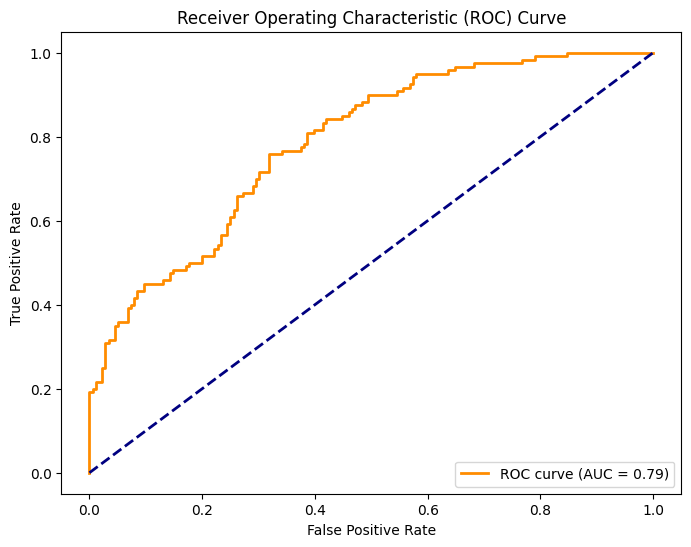

In [102]:
# Analysis on 2 classes prediction
cm_binary = confusion_matrix(y_binary_test, y_binary_pred)
cm_binary_liblinear = confusion_matrix(y_binary_test, y_binary_pred_liblinear)
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_binary_pred))

# Confusion Matrix
print(f"Confusion Matrix Binary Classes Before Feature Scaling : \n{cm_binary}")
print(" ")
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_binary_pred_liblinear))

# Confusion Matrix
print(f"Confusion Matrix liblinear Binary Classes Before Feature Scaling : \n{cm_binary_liblinear}")

print("\n\n")

print(f"Accuracy Before Feature Scaling :  {accuracy_score(y_binary_test, y_binary_pred)}")
print(f"Accuracy liblinear Before Feature Scaling : {accuracy_score(y_binary_test, y_binary_pred_liblinear)}")

y_score = model_binary.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_binary_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [103]:
# Cross Validation
from sklearn.model_selection import cross_val_score

print(cross_val_score(model_liblinear, features_np, labels_array, cv=3))
print(cross_val_score(model, features_np, labels_array, cv=3))
print(cross_val_score(model_binary, features_np, binary_labels_array, cv=3))
print(cross_val_score(model_binary_liblinear, features_np, binary_labels_array, cv=3))

[0.375      0.39634146 0.4054878 ]
[0.38109756 0.41463415 0.41463415]
[0.61585366 0.67682927 0.72865854]
[0.62195122 0.67682927 0.73780488]


In [104]:
# Saving Models Before Standarization
joblib.dump(model_liblinear, f'{dir}trained_model_liblinear.joblib')
joblib.dump(model, f'{dir}trained_model.joblib')
joblib.dump(model_binary, f'{dir}trained_model_binary.joblib')
joblib.dump(model_binary_liblinear, f'{dir}trained_model_binary_liblinear.joblib')

['content/MyDrive/Colab_Notebooks/image_dataset/oxford-iiit-pet/trained_model_binary_liblinear.joblib']

In [105]:
# Read Models
trained_model_liblinear = joblib.load(f'{dir}trained_model_liblinear.joblib')
trained_model = joblib.load(f'{dir}trained_model.joblib')
trained_model_binary = joblib.load(f'{dir}trained_model_binary.joblib')
trained_model_binary_liblinear = joblib.load(f'{dir}trained_model_binary_liblinear.joblib')

In [106]:
# Predict by Loaded Models
# Predict on 5 classes
y_pred = trained_model.predict(X_test)
y_pred_liblinear = trained_model_liblinear.predict(X_test)

# Predict on 2 Classes
y_binary_pred = trained_model_binary.predict(X_test)
y_binary_pred_liblinear = trained_model_binary_liblinear.predict(X_test)

In [107]:
# Scaling Features
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training Model of 5 classes
model.fit(X_train, y_train)
model_liblinear.fit(X_train, y_train)

# Predict on 5 classes
y_pred = model.predict(X_test)
y_pred_liblinear = model_liblinear.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

           1       0.21      0.23      0.22        60
           2       0.19      0.22      0.20        60
           3       0.22      0.21      0.22        56
           4       0.13      0.12      0.12        60
           5       0.21      0.20      0.21        60

    accuracy                           0.20       296
   macro avg       0.19      0.20      0.20       296
weighted avg       0.19      0.20      0.19       296

Confusion Matrix Before Feature Scaling : 
[[14 13  9  8 16]
 [13 13 13 13  8]
 [11 12 12 13  8]
 [14 18  9  7 12]
 [14 12 11 11 12]]


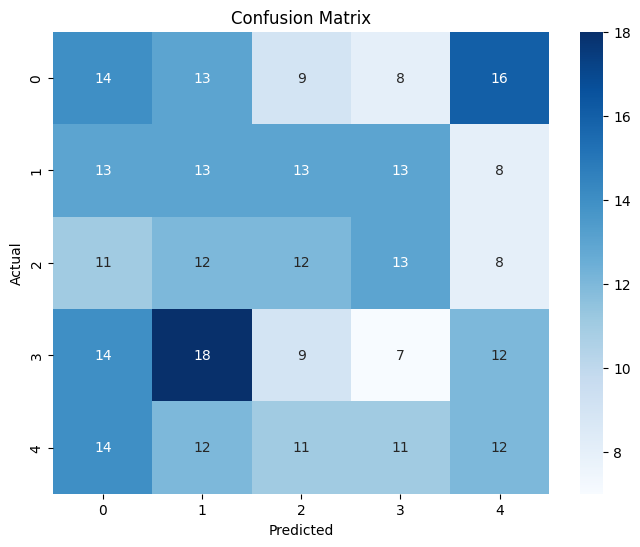

 
Classification Report:
               precision    recall  f1-score   support

           1       0.24      0.20      0.22        60
           2       0.20      0.23      0.22        60
           3       0.19      0.25      0.22        56
           4       0.17      0.13      0.15        60
           5       0.20      0.18      0.19        60

    accuracy                           0.20       296
   macro avg       0.20      0.20      0.20       296
weighted avg       0.20      0.20      0.20       296

Confusion Matrix liblinear Before Feature Scaling : 
[[12 14 12  7 15]
 [10 14 18 12  6]
 [ 7 14 14 11 10]
 [10 15 13  8 14]
 [12 12 15 10 11]]


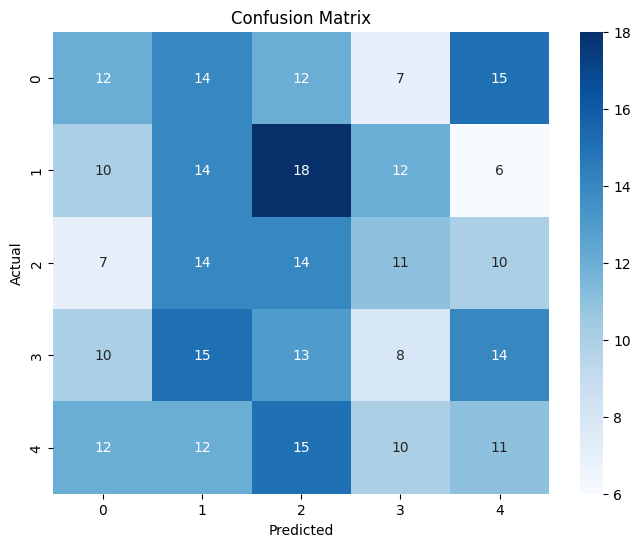

Accuracy Before Feature Scaling :  0.19594594594594594
Accuracy liblinear Before Feature Scaling : 0.19932432432432431


In [108]:
# Analysis on 5 classes prediction
cm = confusion_matrix(y_test, y_pred)
cm_liblinear = confusion_matrix(y_test, y_pred_liblinear)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print(f"Confusion Matrix Before Feature Scaling : \n{cm}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(" ")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_liblinear))

# Confusion Matrix
print(f"Confusion Matrix liblinear Before Feature Scaling : \n{cm_liblinear}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_liblinear, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print(f"Accuracy Before Feature Scaling :  {accuracy_score(y_test, y_pred)}")
print(f"Accuracy liblinear Before Feature Scaling : {accuracy_score(y_test, y_pred_liblinear)}")

Classification Report:
               precision    recall  f1-score   support

           1       0.21      0.23      0.22        60
           2       0.19      0.22      0.20        60
           3       0.22      0.21      0.22        56
           4       0.13      0.12      0.12        60
           5       0.21      0.20      0.21        60

    accuracy                           0.20       296
   macro avg       0.19      0.20      0.20       296
weighted avg       0.19      0.20      0.19       296

Confusion Matrix Binary Classes Before Feature Scaling : 
[[135  41]
 [ 55  65]]
 
Classification Report:
               precision    recall  f1-score   support

           1       0.21      0.23      0.22        60
           2       0.19      0.22      0.20        60
           3       0.22      0.21      0.22        56
           4       0.13      0.12      0.12        60
           5       0.21      0.20      0.21        60

    accuracy                           0.20       296


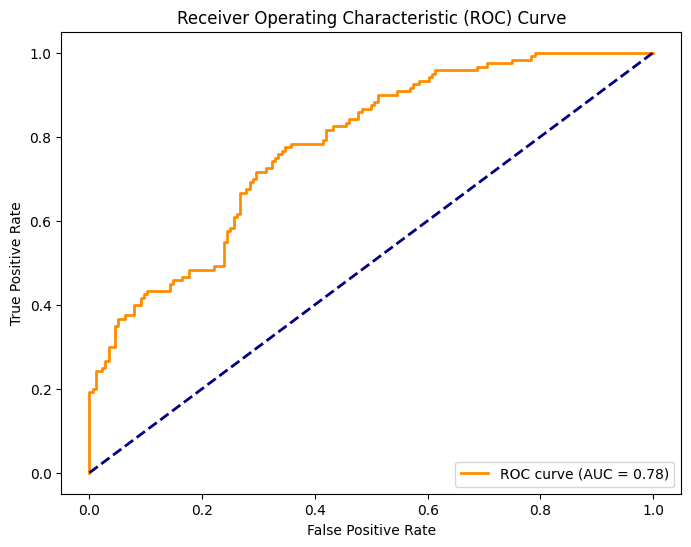

In [109]:
# Analysis on 2 classes prediction
cm_binary = confusion_matrix(y_binary_test, y_binary_pred)
cm_binary_liblinear = confusion_matrix(y_binary_test, y_binary_pred_liblinear)
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print(f"Confusion Matrix Binary Classes Before Feature Scaling : \n{cm_binary}")
print(" ")
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print(f"Confusion Matrix liblinear Binary Classes Before Feature Scaling : \n{cm_binary_liblinear}")

print("\n\n")

print(f"Accuracy Before Feature Scaling :  {accuracy_score(y_binary_test, y_binary_pred)}")
print(f"Accuracy liblinear Before Feature Scaling : {accuracy_score(y_binary_test, y_binary_pred_liblinear)}")

y_score = model_binary.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_binary_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [110]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Apply feature scaling to HOG features
scaler = StandardScaler()
hog_features_train_scaled = scaler.fit_transform(X_train)

# Apply KMeans clustering on scaled HOG features
kmeans = KMeans(n_clusters=len(np.unique(y_train)), random_state=42)  # Adjust parameters as needed
kmeans.fit(hog_features_train_scaled)

# Predict the cluster labels for the training data
predicted_labels = kmeans.predict(hog_features_train_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_train, predicted_labels)
print(f"Accuracy using KMeans as a classifier with feature scaling: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy using KMeans as a classifier with feature scaling: 16.86%


In [111]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Calculate distances from each sample to each cluster center
cluster_centers = kmeans.cluster_centers_
distances = np.sqrt(((hog_features_train_scaled - cluster_centers[:, np.newaxis])**2).sum(axis=2))

# Use minimum distance as a surrogate score for each sample
surrogate_scores = np.min(distances, axis=0)

# Binarize the labels for multi-class classification
binary_labels = label_binarize(y_train, classes=np.unique(y_train))
print(binary_labels.shape[1])
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(binary_labels.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(binary_labels[:, i], surrogate_scores)
    roc_auc[i] = auc(fpr[i], tpr[i])



# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'limegreen', 'fuchsia']  # Define colors for classes
for i, _ in zip(range(binary_labels.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=_, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve using KMeans')
plt.legend(loc="lower right")
plt.show()

5


ValueError: ignored

<Figure size 800x600 with 0 Axes>